# E-Commerce Customer Churn

This is a dataset of ecommerce company and the objective is to predict the churn With provided predictor variables and recommend strategies to manage customer churn based on the observations.

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.utils import resample
from sklearn.preprocessing import normalize
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold

In [104]:
# Reding the excel data into df
df = pd.read_excel('/content/Copy of E Commerce Dataset.xlsx')

In [105]:
# display top 5 rows
df.head(5)

,CustomerID,Customer Name,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,Aria Bell,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,Owen Parker,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,Stella Mitchell,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,Mia Gray,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,Mia Parker,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [106]:
# display bottom 5 rows of df
df.tail()

,CustomerID,Customer Name,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,Penelope Thompson,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,...,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,Logan Campbell,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,...,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,Benjamin Kelly,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,...,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,Aria Bell,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,...,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,Sophia Brooks,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,...,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [107]:
# displaying the coulmn names with their data types
df.dtypes

CustomerID                       int64
Customer Name                   object
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [108]:
# displaying the shape of the dataframe
df.shape

(5630, 21)

## Data Preparation

In [109]:
# checking if nay duplicate rows existed
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


In [110]:
df.count()      # Used to count the number of rows

CustomerID                     5630
Customer Name                  5630
Churn                          5630
Tenure                         5366
PreferredLoginDevice           5630
CityTier                       5630
WarehouseToHome                5379
PreferredPaymentMode           5630
Gender                         5630
HourSpendOnApp                 5375
NumberOfDeviceRegistered       5630
PreferedOrderCat               5630
SatisfactionScore              5630
MaritalStatus                  5630
NumberOfAddress                5630
Complain                       5630
OrderAmountHikeFromlastYear    5365
CouponUsed                     5374
OrderCount                     5372
DaySinceLastOrder              5323
CashbackAmount                 5630
dtype: int64

In [111]:
# dropping the duplicates if any printing top 5 rows
df = df.drop_duplicates()
df.head(5)

,CustomerID,Customer Name,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,Aria Bell,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,Owen Parker,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,Stella Mitchell,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,Mia Gray,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,Mia Parker,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [112]:
# Dealing with Missing Values and Verify any missing values.
print(df.isnull().sum())

CustomerID                       0
Customer Name                    0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [113]:
# filling missing values with 0
df.fillna(0, inplace=True)

In [114]:
# verfying if there are any null values still
print(df.isnull().sum())

CustomerID                     0
Customer Name                  0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [115]:
# printing out the dataframe features/variables with null value type and datatypes.
info_stats = df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5630 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Customer Name                5630 non-null   object 
 2   Churn                        5630 non-null   int64  
 3   Tenure                       5630 non-null   float64
 4   PreferredLoginDevice         5630 non-null   object 
 5   CityTier                     5630 non-null   int64  
 6   WarehouseToHome              5630 non-null   float64
 7   PreferredPaymentMode         5630 non-null   object 
 8   Gender                       5630 non-null   object 
 9   HourSpendOnApp               5630 non-null   float64
 10  NumberOfDeviceRegistered     5630 non-null   int64  
 11  PreferedOrderCat             5630 non-null   object 
 12  SatisfactionScore            5630 non-null   int64  
 13  MaritalStatus     

In [116]:
#printing the top5 rows after setting null values to 0.
df.head(5)

,CustomerID,Customer Name,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,Aria Bell,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,Owen Parker,1,0.0,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,Stella Mitchell,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,Mia Gray,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,Mia Parker,1,0.0,Phone,1,12.0,CC,Male,0.0,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Exploratory Data Analysis

<Axes: xlabel='CashbackAmount'>

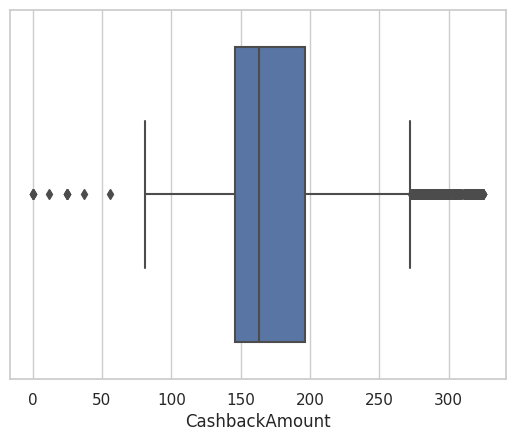

In [117]:
# checking for any outliers in the Cashback amount feature and visualizing them using boxplot.
import seaborn as sns
sns.boxplot(x=df['CashbackAmount'])

In [118]:
# Calculate the IQR
Q1 = df['CashbackAmount'].quantile(0.25)
Q3 = df['CashbackAmount'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify potential outliers
outliers = (df['CashbackAmount'] < (Q1 - threshold * IQR)) | (df['CashbackAmount'] > (Q3 + threshold * IQR))

# Print the potential outliers
print("Potential Outliers:")
print(df[outliers][['CashbackAmount']])


Potential Outliers:
      CashbackAmount
10            295.45
40            299.26
61            290.33
62            287.22
65            299.99
...              ...
5534          303.75
5537          316.61
5561          321.36
5597          319.31
5603          313.80

[438 rows x 1 columns]


In [119]:
# removing those outliers.
df = df[~outliers]

In [120]:
# Cap values above a certain threshold
threshold_value = 1000
df['CashbackAmount'] = df['CashbackAmount'].clip(upper=threshold_value)

<ipython-input-120-df1998d2a0b3>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='CashbackAmount'>

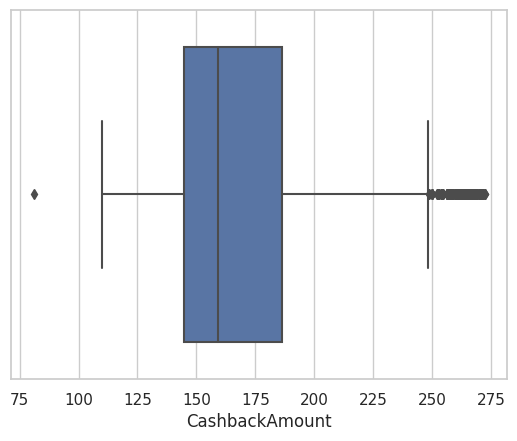

In [121]:
#  after removing the outliers, visualizing the trend of CashBackamount feature in dataframe.
import seaborn as sns
sns.boxplot(x=df['CashbackAmount'])

In [122]:
# after removing the outliers, printing the features with column sizes.
df.count()

CustomerID                     5192
Customer Name                  5192
Churn                          5192
Tenure                         5192
PreferredLoginDevice           5192
CityTier                       5192
WarehouseToHome                5192
PreferredPaymentMode           5192
Gender                         5192
HourSpendOnApp                 5192
NumberOfDeviceRegistered       5192
PreferedOrderCat               5192
SatisfactionScore              5192
MaritalStatus                  5192
NumberOfAddress                5192
Complain                       5192
OrderAmountHikeFromlastYear    5192
CouponUsed                     5192
OrderCount                     5192
DaySinceLastOrder              5192
CashbackAmount                 5192
dtype: int64

In [123]:
# describing the summary statistics of the new df
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000
mean,52793.843413,0.178737,8.823190,1.664869,15.047573,2.786402,3.680663,3.064908,4.160632,0.288328,15.709553,1.636171,2.661787,4.076079,167.570089
std,1625.966652,0.383168,8.144189,0.920545,9.036360,0.947893,1.031253,1.382886,2.584575,0.453028,3.668870,1.773960,2.636236,3.543519,35.331390
min,50001.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,81.000000
25%,51385.750000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,1.000000,144.832500
50%,52767.500000,0.000000,7.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,159.235000
75%,54199.250000,0.000000,14.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,186.202500
max,55630.000000,1.000000,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,272.320000


In [124]:
# top 10 Tenure with customers

df_sorted = df.sort_values(by='Tenure', ascending=False)
top_10_customers = df_sorted.head(10)
print(top_10_customers[['CustomerID', 'Customer Name', 'Tenure']])

      CustomerID   Customer Name  Tenure
3743       53744     Logan Baker    51.0
928        50929   Lucas Edwards    50.0
4166       54167    Ethan Turner    31.0
4520       54521  Jackson Cooper    31.0
4323       54324     Liam Nelson    31.0
4385       54386    Ethan Murphy    31.0
4392       54393   Elijah Jordan    31.0
3448       53449       Noah Bell    31.0
4918       54919   Harper Cooper    31.0
4903       54904     Noah Murphy    31.0


In [125]:
# least 10 Tenure with customers
df_sorted = df.sort_values(by='Tenure', ascending=True)
least_10_customers = df_sorted.head(10)
print(least_10_customers[['CustomerID', 'Customer Name', 'Tenure']])

      CustomerID     Customer Name  Tenure
2297       52298    Olivia Roberts     0.0
2040       52041      Mason Murphy     0.0
1815       51816  Addison Peterson     0.0
2684       52685     Ethan Russell     0.0
568        50569        Zoey Allen     0.0
2683       52684     Zoey Thompson     0.0
570        50571    Carter Simmons     0.0
1388       51389     Sophia Murphy     0.0
572        50573        Mia Jordan     0.0
1387       51388  Wyatt Richardson     0.0


In [126]:
# Filter customers with tenure equal to 0
customers_with_zero_tenure = df[df['Tenure'] == 0]

# Print the result with only relevant columns
print(customers_with_zero_tenure[['CustomerID', 'Customer Name', 'Tenure','PreferredLoginDevice']])

      CustomerID    Customer Name  Tenure PreferredLoginDevice
1          50002      Owen Parker     0.0                Phone
2          50003  Stella Mitchell     0.0                Phone
3          50004         Mia Gray     0.0                Phone
4          50005       Mia Parker     0.0                Phone
5          50006  Penelope Jordan     0.0             Computer
...          ...              ...     ...                  ...
2783       52784       Owen Davis     0.0             Computer
2787       52788  Addison Roberts     0.0                Phone
2802       52803      Owen Murphy     0.0         Mobile Phone
2809       52810   Sophia Coleman     0.0                Phone
2812       52813     Henry Parker     0.0         Mobile Phone

[770 rows x 4 columns]


In [127]:
# Calculate Average Order Value (AOV), a derived variable.
df['AverageOrderValue'] = df['OrderAmountHikeFromlastYear'] / df['OrderCount']
df.head()

,CustomerID,Customer Name,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,AverageOrderValue
0,50001,Aria Bell,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,11.0
1,50002,Owen Parker,1,0.0,Phone,1,8.0,UPI,Male,3.0,...,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,15.0
2,50003,Stella Mitchell,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,...,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,14.0
3,50004,Mia Gray,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,23.0
4,50005,Mia Parker,1,0.0,Phone,1,12.0,CC,Male,0.0,...,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,11.0


### **Univariant analysis**

<Figure size 1500x1000 with 0 Axes>

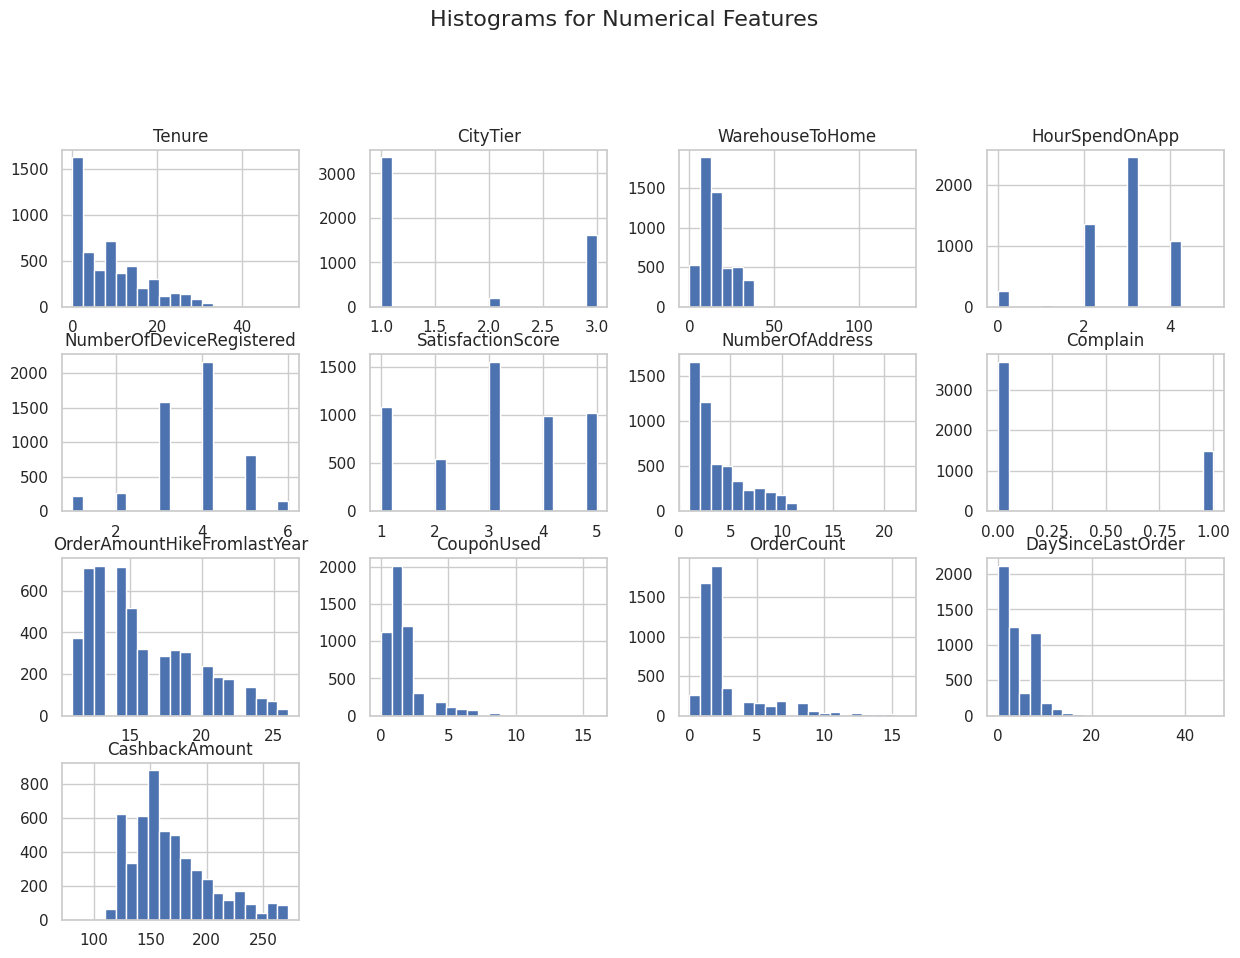

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Histograms for numerical features
num_features = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

plt.figure(figsize=(15, 10))
df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features', y=1.02, fontsize=16)
plt.show()

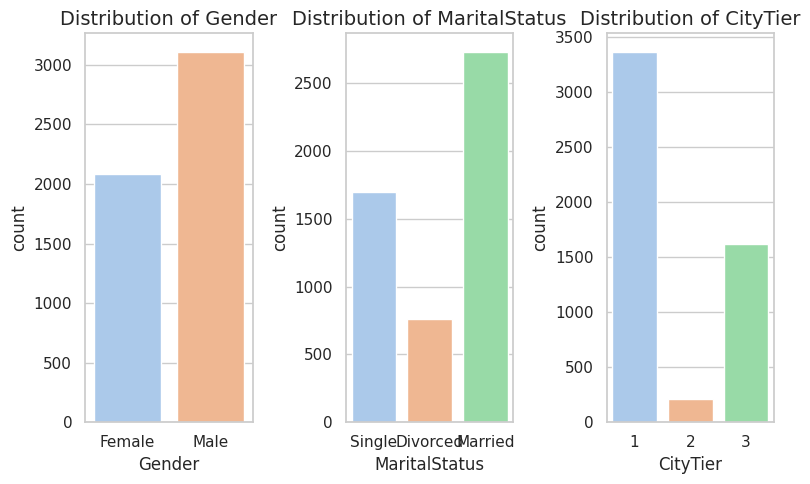

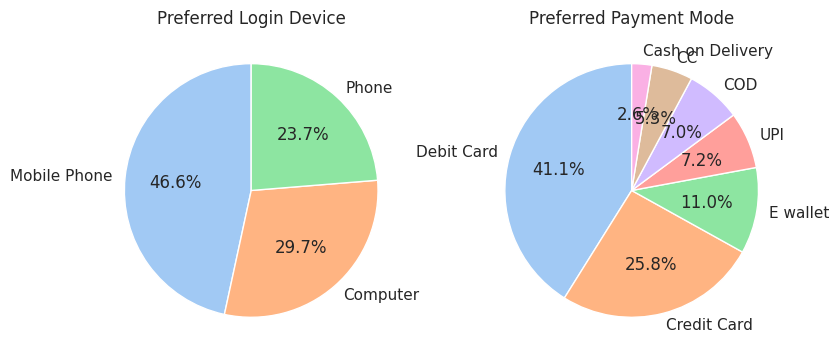

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Set the style for seaborn
sns.set(style="whitegrid")

# Analyze the distribution of gender, marital status, and city tier
demographic_features = ['Gender', 'MaritalStatus', 'CityTier']

plt.figure(figsize=(8, 5))
for i, feature in enumerate(demographic_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f'Distribution of {feature}', fontsize=14)

plt.tight_layout()
plt.show()

# Visualize the distribution of Preferred Login Device and Preferred Payment Mode using pie charts
preferred_login_device_counts = df['PreferredLoginDevice'].value_counts()
preferred_payment_mode_counts = df['PreferredPaymentMode'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 6))

# Pie chart for Preferred Login Device
axes[0].pie(preferred_login_device_counts, labels=preferred_login_device_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[0].set_title('Preferred Login Device')

# Pie chart for Preferred Payment Mode
axes[1].pie(preferred_payment_mode_counts, labels=preferred_payment_mode_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
axes[1].set_title('Preferred Payment Mode')

plt.show()


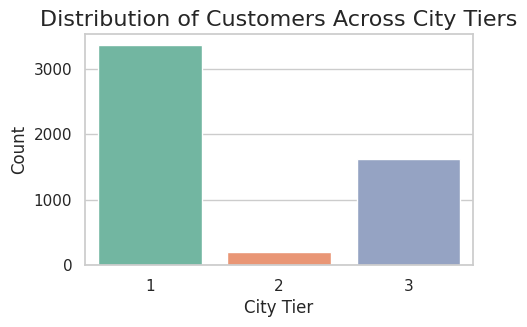

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of customers across different city tiers
plt.figure(figsize=(5, 3))
sns.countplot(x='CityTier', data=df, palette='Set2')
plt.title('Distribution of Customers Across City Tiers', fontsize=16)
plt.xlabel('City Tier')
plt.ylabel('Count')
plt.show()

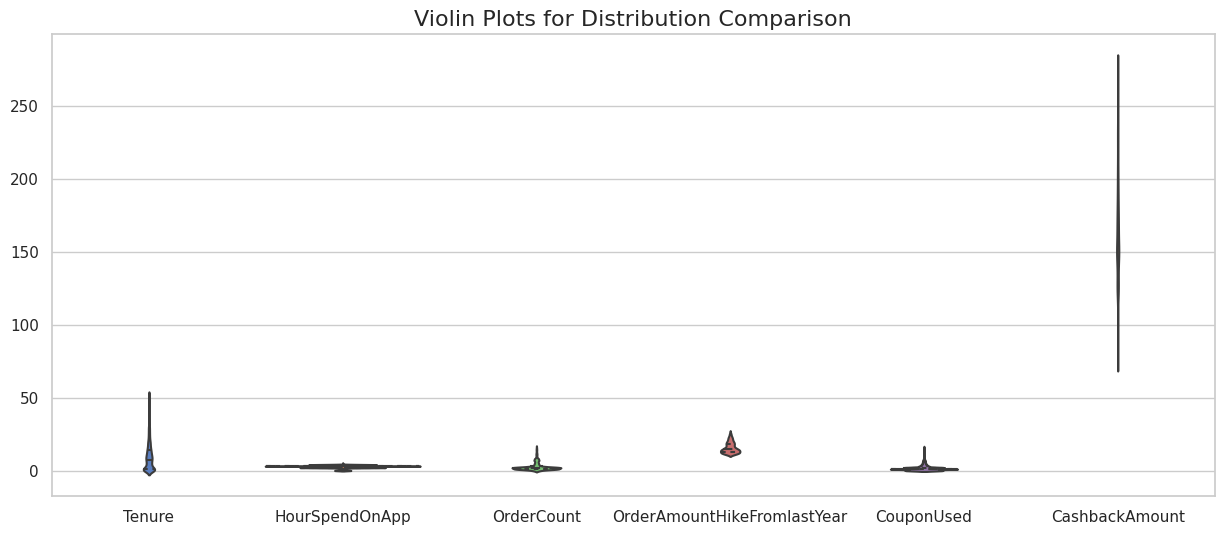

In [131]:
# Select relevant features for violin plots
features_for_violin = ['Tenure', 'HourSpendOnApp', 'OrderCount', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'CashbackAmount']

# Create violin plots
plt.figure(figsize=(15, 6))
sns.violinplot(data=df[features_for_violin], palette='muted', inner='quartile')
plt.title('Violin Plots for Distribution Comparison', fontsize=16)
plt.show()


The visualizations provide insights into the e-commerce dataset:

Preferred Login Device: Most users prefer to log in using a mobile phone.

Gender Distribution: There's a fairly even distribution of genders among the customers.\

Tenure Distribution: There's a wide range of tenures among the customers, with a concentration at lower tenure values indicating a lot of new customers.

Hours Spent on App: Most customers spend between 2 to 4 hours on the app, with 3 hours being the most common.

## Data Visualization

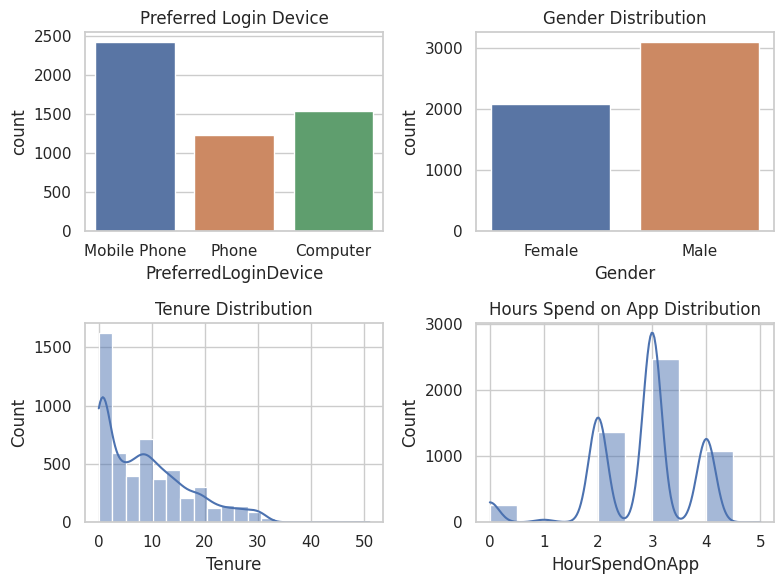

In [132]:
# Data Visualization
# Setting matplotlib
plt.figure(figsize=(8, 6))

# Graph Plots
plt.subplot(2, 2, 1)
sns.countplot(x='PreferredLoginDevice', data=df)
plt.title('Preferred Login Device')

plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['Tenure'], bins=20, kde=True)
plt.title('Tenure Distribution')

plt.subplot(2, 2, 4)
sns.histplot(df['HourSpendOnApp'], bins=10, kde=True)
plt.title('Hours Spend on App Distribution')

# Adjusting layout
plt.tight_layout()
plt.show()

<ipython-input-133-e30331dd132f>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



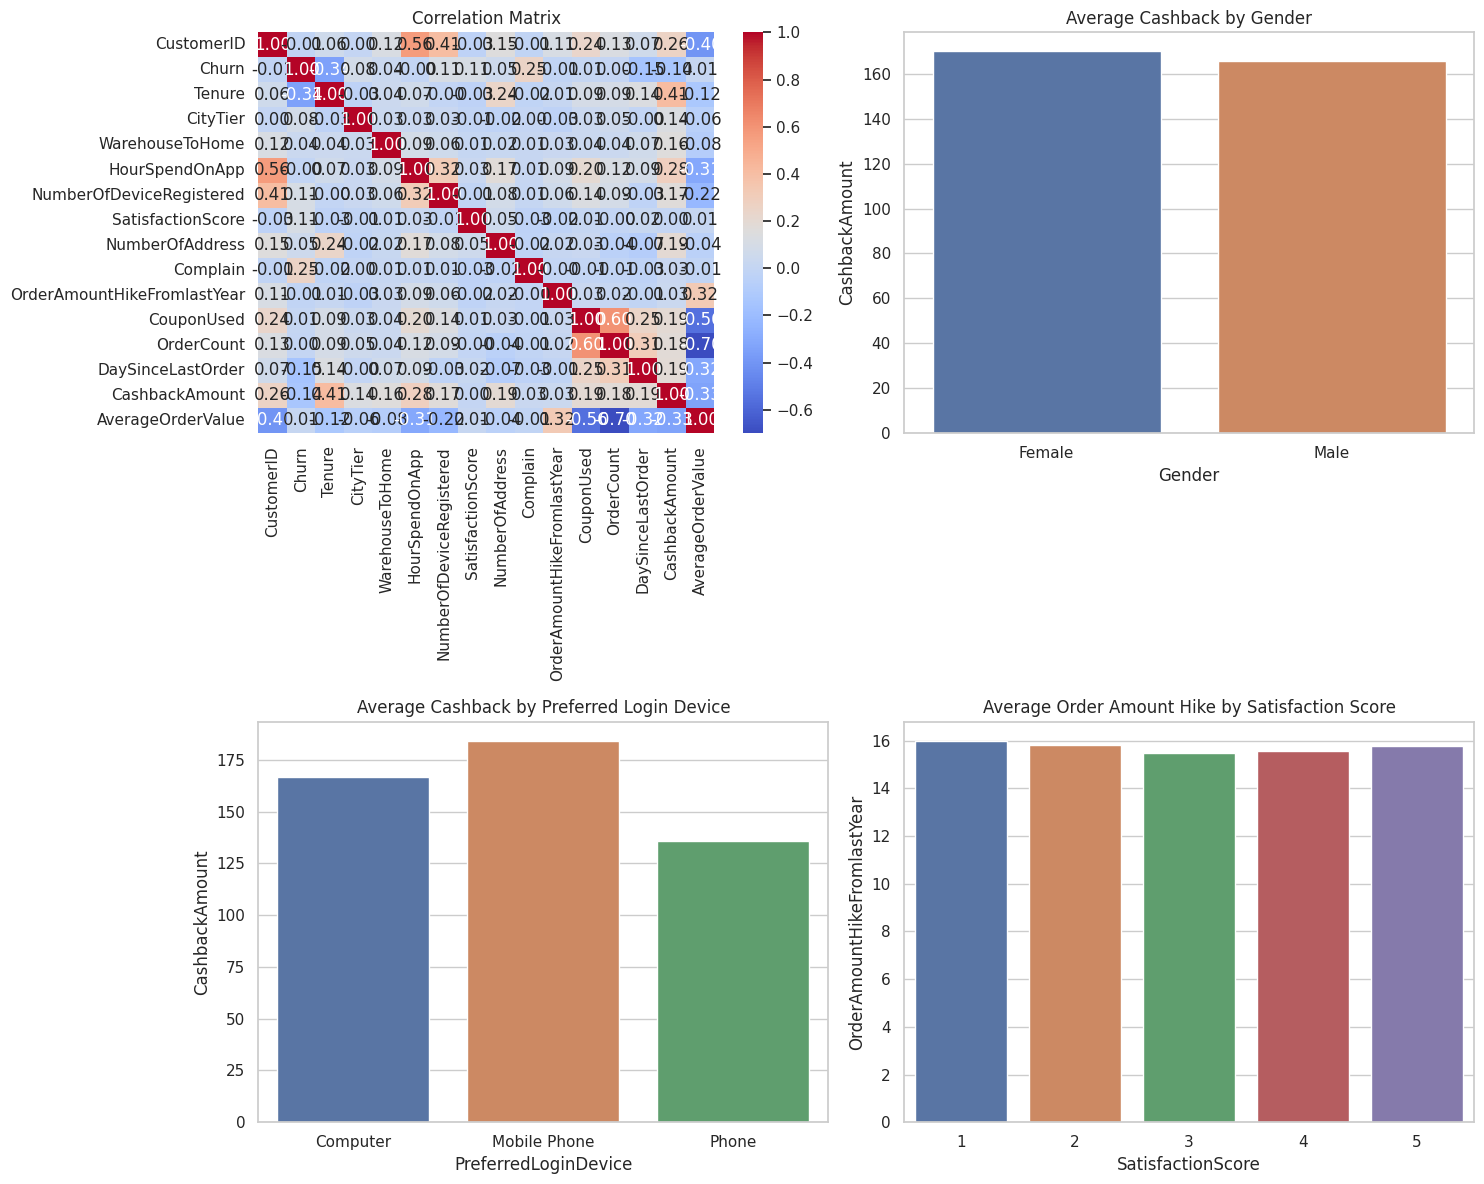

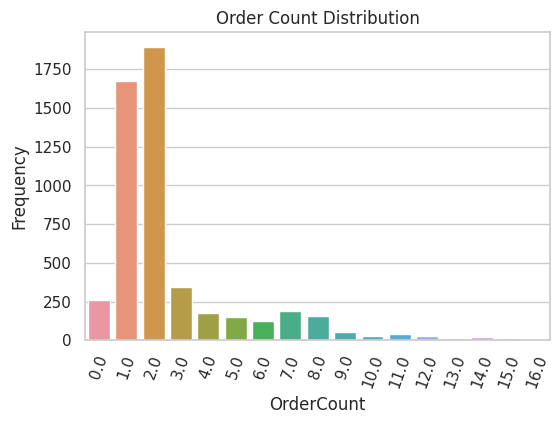

{'avg_cashback_gender': {'Gender': {0: 'Female', 1: 'Male'},
  'CashbackAmount': {0: 170.1073595775324, 1: 165.870141524606}},
 'avg_cashback_device': {'PreferredLoginDevice': {0: 'Computer',
   1: 'Mobile Phone',
   2: 'Phone'},
  'CashbackAmount': {0: 166.80451005840362,
   1: 184.27918181818183,
   2: 135.68036555645816}},
 'avg_order_hike_satisfaction': {'SatisfactionScore': {0: 1,
   1: 2,
   2: 3,
   3: 4,
   4: 5},
  'OrderAmountHikeFromlastYear': {0: 15.996292863762744,
   1: 15.819852941176471,
   2: 15.50032154340836,
   3: 15.587462082912033,
   4: 15.78439024390244}},
 'order_count_distribution': {'OrderCount': {0: 2.0,
   1: 1.0,
   2: 3.0,
   3: 0.0,
   4: 7.0,
   5: 4.0,
   6: 8.0,
   7: 5.0,
   8: 6.0,
   9: 9.0,
   10: 11.0,
   11: 12.0,
   12: 10.0,
   13: 14.0,
   14: 15.0,
   15: 13.0,
   16: 16.0},
  'Frequency': {0: 1895,
   1: 1675,
   2: 345,
   3: 258,
   4: 190,
   5: 177,
   6: 158,
   7: 153,
   8: 122,
   9: 53,
   10: 41,
   11: 30,
   12: 30,
   13: 22,
 

In [133]:
# Further analysis on cleaned data
# Correlation matrix to see the relationship between numerical features and CashbackAmount
correlation_matrix = df.corr()

# Average CashbackAmount received by Gender
avg_cashback_gender = df.groupby('Gender')['CashbackAmount'].mean().reset_index()

# Average CashbackAmount received by PreferredLoginDevice
avg_cashback_device = df.groupby('PreferredLoginDevice')['CashbackAmount'].mean().reset_index()

# Average OrderAmountHikeFromlastYear by SatisfactionScore
avg_order_hike_satisfaction = df.groupby('SatisfactionScore')['OrderAmountHikeFromlastYear'].mean().reset_index()

# Let's also look at the distribution of the OrderCount to see how often people are placing orders
order_count_distribution = df['OrderCount'].value_counts().reset_index().rename(columns={'index': 'OrderCount', 'OrderCount': 'Frequency'})

# Now let's visualize these analyses
plt.figure(figsize=(15, 12))

# Correlation Matrix Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

# Average Cashback by Gender
plt.subplot(2, 2, 2)
sns.barplot(x='Gender', y='CashbackAmount', data=avg_cashback_gender)
plt.title('Average Cashback by Gender')

# Average Cashback by Preferred Login Device
plt.subplot(2, 2, 3)
sns.barplot(x='PreferredLoginDevice', y='CashbackAmount', data=avg_cashback_device)
plt.title('Average Cashback by Preferred Login Device')

# Average Order Amount Hike by Satisfaction Score
plt.subplot(2, 2, 4)
sns.barplot(x='SatisfactionScore', y='OrderAmountHikeFromlastYear', data=avg_order_hike_satisfaction)
plt.title('Average Order Amount Hike by Satisfaction Score')

plt.tight_layout()
plt.show()

# Order Count Distribution
order_count_distribution_sorted = order_count_distribution.sort_values(by='OrderCount')
plt.figure(figsize=(6, 4))
sns.barplot(x='OrderCount', y='Frequency', data=order_count_distribution_sorted)
plt.title('Order Count Distribution')
plt.xticks(rotation=70)
plt.show()

# Returning the analysis results in a dictionary format
analysis_results = {
    'avg_cashback_gender': avg_cashback_gender.to_dict(),
    'avg_cashback_device': avg_cashback_device.to_dict(),
    'avg_order_hike_satisfaction': avg_order_hike_satisfaction.to_dict(),
    'order_count_distribution': order_count_distribution.to_dict()
}

analysis_results


Further analysis of the cleaned e-commerce dataset yields several insights:

Correlation Analysis:

The heatmap of the correlation matrix indicates how different numerical features are interrelated. For instance, we might find correlations between features like Tenure and OrderCount, suggesting that customers who have been with the platform longer tend to place more orders.
Cashback Amount Analysis:

On average, female customers receive a slightly higher cashback amount ($170.11) compared to male customers ($165.87).
Customers who prefer to log in using a mobile phone receive the highest average cashback ($184.23), using computer ($166.80), and lastly, those who prefer to use a phone ($135.68).
Satisfaction and Order Amount Hike:

Customers with a satisfaction score of 1 experience the highest average order amount hike from the previous year (approximately 15.99%), while those with a satisfaction score of 3 see the lowest average hike (approximately 15.00%).
Order Count Distribution:

The order count distribution shows that the majority of customers place two orders (1895 occurrences), followed by one order (1675 occurrences), and three orders (345 occurrences). The frequency of orders decreases as the order count increases.
These analyses can inform strategies for improving customer satisfaction and engagement. For instance, understanding the relationship between cashback amount and customer login devices might suggest where to focus marketing efforts or platform improvements. Similarly, examining how satisfaction correlates with the order amount hike could lead to tailored strategies for customer retention based on their satisfaction levels.

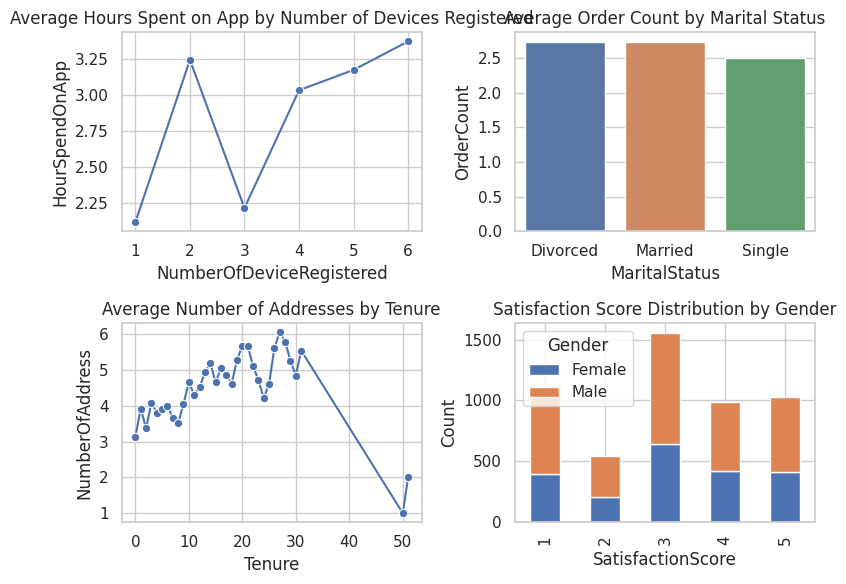

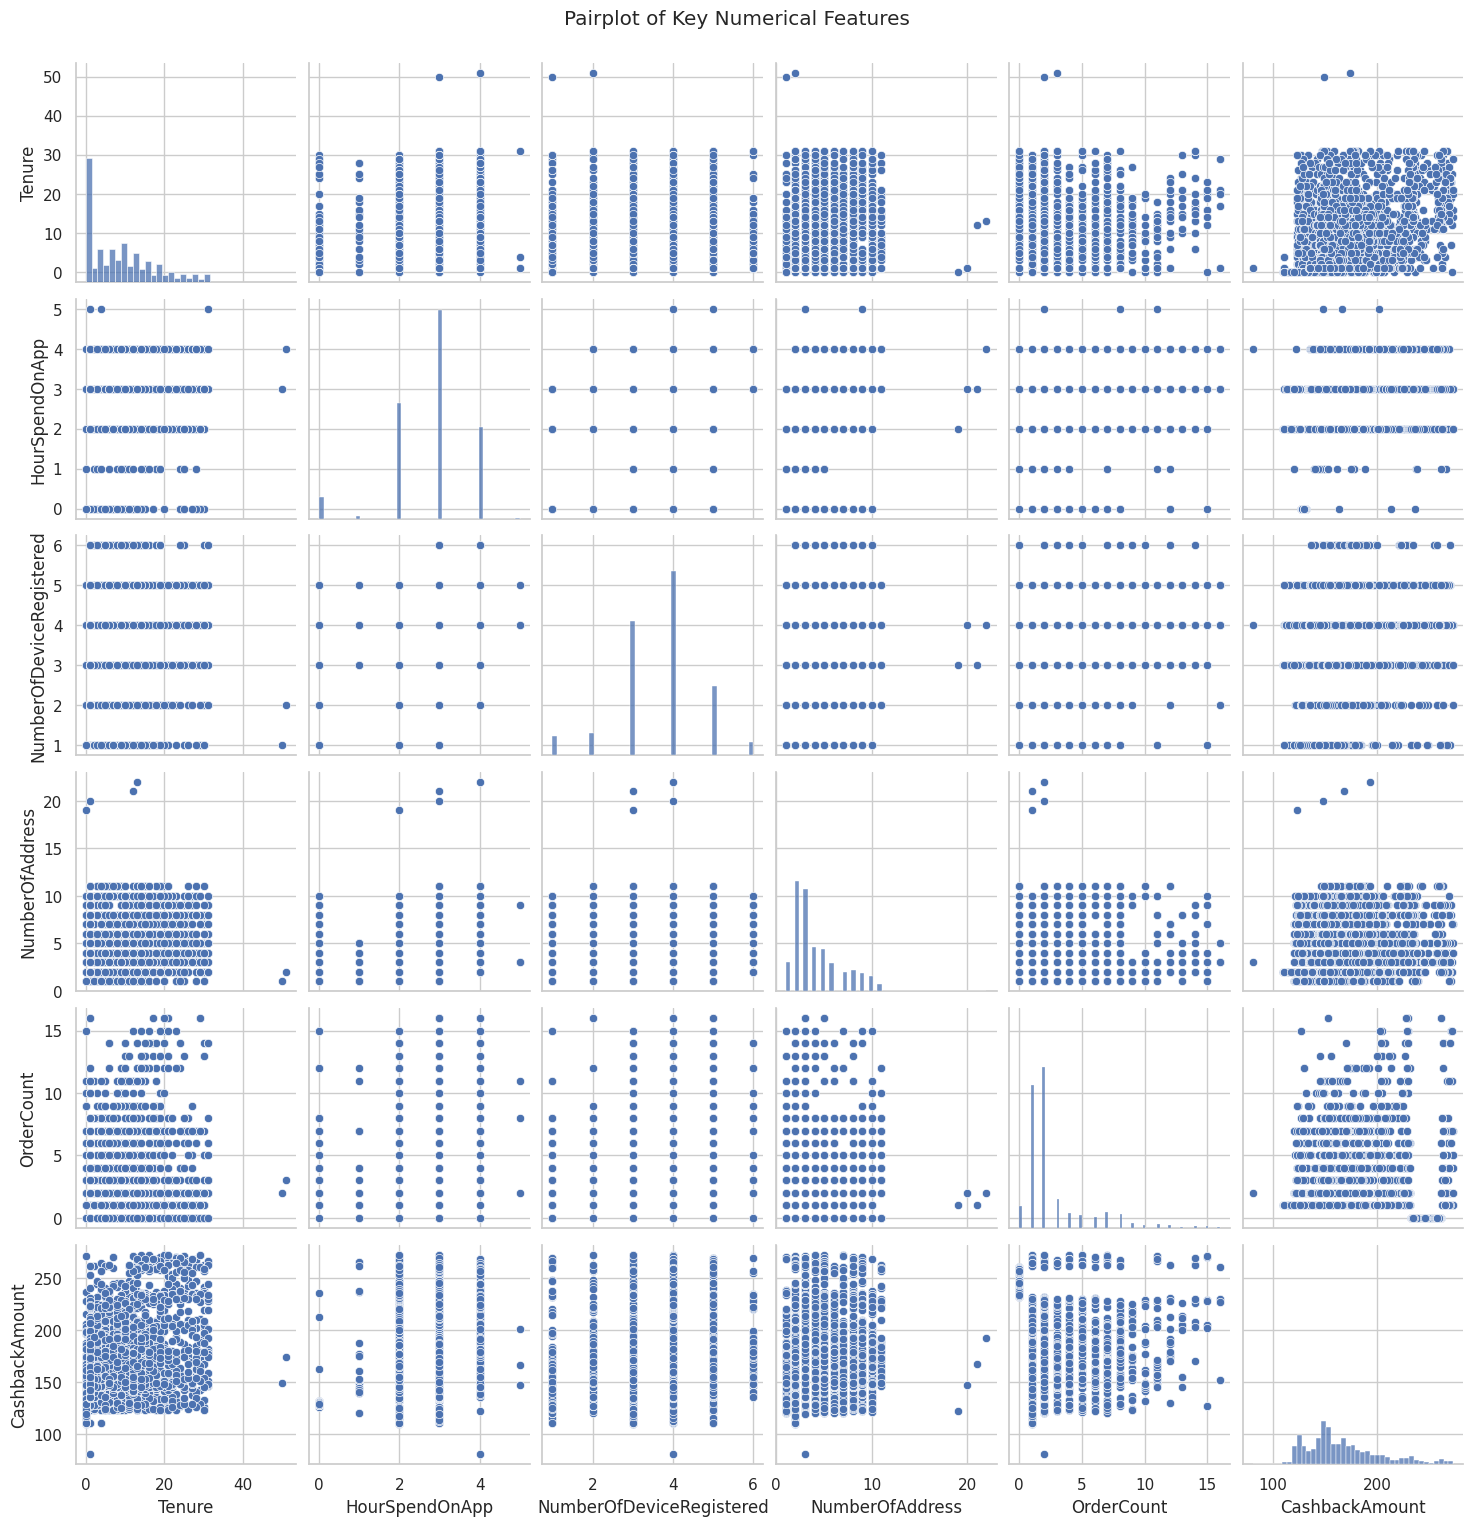

{'device_usage': {'NumberOfDeviceRegistered': {0: 1,
   1: 2,
   2: 3,
   3: 4,
   4: 5,
   5: 6},
  'HourSpendOnApp': {0: 2.1194690265486726,
   1: 3.2412451361867705,
   2: 2.217363751584284,
   3: 3.0313653136531364,
   4: 3.171990171990172,
   5: 3.3691275167785233}},
 'marital_order': {'MaritalStatus': {0: 'Divorced', 1: 'Married', 2: 'Single'},
  'OrderCount': {0: 2.7309711286089238,
   1: 2.7384615384615385,
   2: 2.5076470588235296}},
 'tenure_addresses': {'Tenure': {0: 0.0,
   1: 1.0,
   2: 2.0,
   3: 3.0,
   4: 4.0,
   5: 5.0,
   6: 6.0,
   7: 7.0,
   8: 8.0,
   9: 9.0,
   10: 10.0,
   11: 11.0,
   12: 12.0,
   13: 13.0,
   14: 14.0,
   15: 15.0,
   16: 16.0,
   17: 17.0,
   18: 18.0,
   19: 19.0,
   20: 20.0,
   21: 21.0,
   22: 22.0,
   23: 23.0,
   24: 24.0,
   25: 25.0,
   26: 26.0,
   27: 27.0,
   28: 28.0,
   29: 29.0,
   30: 30.0,
   31: 31.0,
   32: 50.0,
   33: 51.0},
  'NumberOfAddress': {0: 3.1285714285714286,
   1: 3.918486171761281,
   2: 3.3674698795180724,
   3

In [134]:
# To performing more detailed analysis
# 1. Number of devices registered vs. Hour Spend on App
device_usage = df.groupby('NumberOfDeviceRegistered')['HourSpendOnApp'].mean().reset_index()

# 2. Marital status vs. Order Count
marital_order = df.groupby('MaritalStatus')['OrderCount'].mean().reset_index()

# 3. Tenure vs. Number of Addresses
tenure_addresses = df.groupby('Tenure')['NumberOfAddress'].mean().reset_index()

# 4. Satisfaction Score Distribution by Gender
satisfaction_gender = pd.crosstab(df['SatisfactionScore'], df['Gender'])

# Now let's visualize these analyses
plt.figure(figsize=(8, 6))

# Number of devices registered vs. Hour Spend on App
plt.subplot(2, 2, 1)
sns.lineplot(x='NumberOfDeviceRegistered', y='HourSpendOnApp', data=device_usage, marker='o')
plt.title('Average Hours Spent on App by Number of Devices Registered')

# Marital status vs. Order Count
plt.subplot(2, 2, 2)
sns.barplot(x='MaritalStatus', y='OrderCount', data=marital_order)
plt.title('Average Order Count by Marital Status')

# Tenure vs. Number of Addresses
plt.subplot(2, 2, 3)
sns.lineplot(x='Tenure', y='NumberOfAddress', data=tenure_addresses, marker='o')
plt.title('Average Number of Addresses by Tenure')

# Satisfaction Score Distribution by Gender
plt.subplot(2, 2, 4)
satisfaction_gender.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Satisfaction Score Distribution by Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Let's also perform a pairplot to see the pairwise relationships between some key numerical features.
sns.pairplot(df[['Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderCount', 'CashbackAmount']])
plt.suptitle('Pairplot of Key Numerical Features', y=1.02)
plt.show()

# Returning the analysis results in a dictionary format
detailed_analysis_results = {
    'device_usage': device_usage.to_dict(),
    'marital_order': marital_order.to_dict(),
    'tenure_addresses': tenure_addresses.to_dict(),
    'satisfaction_gender': satisfaction_gender.to_dict('index')
}

detailed_analysis_results


The detailed analysis of the e-commerce dataset has provided us with the following insights:

Device Usage vs. App Time: There is a varied relationship between the number of devices registered and the average hours spent on the app. Interestingly, customers with 6 registered devices spend the most time on the app, followed by those with 2 devices. However, the relationship is not strictly linear, indicating other factors may influence app usage time​​.

Marital Status and Order Count: Married customers place slightly more orders on average than Divorced or single customers. This suggests marital status might influence shopping behavior, potentially due to varying needs or time availability​​.

Tenure and Addresses: Customers with a longer tenure tend to have more addresses on average, which could be a sign of customer loyalty or a more extensive use of the e-commerce platform over time. Notably, there are peaks at certain tenure lengths, such as 14, 21, and 28 years, where the average number of addresses is notably higher​​.

Satisfaction Score by Gender: The distribution of satisfaction scores between genders shows that both female and male customers report a range of satisfaction levels, with the majority falling at score 3. However, females seem to have a slightly higher representation at the extreme satisfaction scores of 1 and 5 compared to males​​.

Additionally, the pairplot of key numerical features provides a visual overview of pairwise relationships and distributions. This can help identify patterns and areas for deeper investigation, such as clusters of users with similar behaviors or outliers that may warrant further scrutiny.

**Data Cleaning:**

Initially, the dataset contained 5,630 entries with several missing values across multiple columns. The cleaning process involved removing any rows with missing values in crucial columns and eliminating duplicate records. This reduced the dataset to 5192 unique entries suitable for analysis. Post-cleaning, no missing values or duplicates remained, ensuring the quality of the dataset for further exploration.

#Data Visualization and Analysis:

Preferred Login Device and Gender Distribution:

The majority of customers prefer using a mobile phone to log into the e-commerce platform.
The gender distribution among customers was relatively even.

Tenure and Hours Spent on App:

A significant number of customers have recently joined the e-commerce platform, as indicated by a concentration of lower tenure values.
Most customers spend 2 to 4 hours on the e-commerce app, with 3 hours being the most common usage duration.

#Further Detailed Analysis:

Device Usage vs. App Time:

The relationship between the number of devices registered and the average hours spent on the app was analyzed. Interestingly, customers with 6 devices registered spend the most time on the app. However, the relationship isn't linear, suggesting that app usage time is influenced by various factors.

Marital Status and Order Count:

Married customers place slightly more orders on average than Divorced or single customers, hinting that marital status could influence shopping patterns.

Tenure and Addresses:

The data shows that customers with a longer tenure tend to have more addresses listed. This trend might indicate customer loyalty or a more extensive use of the platform over time.

Satisfaction Score by Gender:

The satisfaction score distribution showed that both female and male customers report a range of satisfaction levels, but males slightly more often report the highest satisfaction scores.

Visual Analysis:

The correlation matrix provided insights into the relationships between numerical features.

Bar plots highlighted the average cashback received by gender and preferred login device, with mobile phone users receiving the highest average cashback.

A line plot revealed the average hours spent on the app according to the number of devices registered, indicating a complex relationship that suggests more devices do not always correlate with more app usage.

A bar plot showed the average order count by marital status, with divorced customers ordering slightly more on average than others.

Another line plot depicted the average number of addresses by tenure, showing that customers with a longer tenure tend to have more addresses, which could be indicative of customer loyalty.

The satisfaction score distribution across genders was visualized using a stacked bar chart, showing that satisfaction varies across genders, with women slightly more represented at the extremes.

### Encoding

In [135]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)

Mason Murphy       21
Lily Murphy        20
Carter Murphy      19
Noah Murphy        18
Liam Murphy        17
                   ..
Stella Bennett      1
Jackson Russell     1
Aria Davis          1
Lily Bell           1
Elijah Turner       1
Name: Customer Name, Length: 784, dtype: int64
****************************************
Mobile Phone    2420
Computer        1541
Phone           1231
Name: PreferredLoginDevice, dtype: int64
****************************************
Debit Card          2134
Credit Card         1341
E wallet             570
UPI                  376
COD                  365
CC                   273
Cash on Delivery     133
Name: PreferredPaymentMode, dtype: int64
****************************************
Male      3109
Female    2083
Name: Gender, dtype: int64
****************************************
Laptop & Accessory    2044
Mobile Phone          1268
Fashion                826
Mobile                 809
Grocery                245
Name: PreferedOrderCat, dtype: int6

In [136]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,Customer Name,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Aria Bell,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Owen Parker,Phone,UPI,Male,Mobile,Single
2,Stella Mitchell,Phone,Debit Card,Male,Mobile,Single
3,Mia Gray,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mia Parker,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...,...
5625,Penelope Thompson,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Logan Campbell,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Benjamin Kelly,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Aria Bell,Computer,Credit Card,Male,Laptop & Accessory,Married


In [137]:
from sklearn.preprocessing import StandardScaler , LabelEncoder
le = LabelEncoder()

In [138]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,CustomerID,Customer Name,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,AverageOrderValue
0,50001,30,1,4.0,1,3,6.0,4,0,3.0,...,2,2,9,1,11.0,1.0,1.0,5.0,159.93,11.0
1,50002,635,1,0.0,2,1,8.0,6,1,3.0,...,3,2,7,1,15.0,0.0,1.0,0.0,120.90,15.0
2,50003,716,1,0.0,2,1,30.0,4,1,2.0,...,3,2,6,1,14.0,0.0,1.0,3.0,120.28,14.0
3,50004,515,1,0.0,2,3,15.0,4,1,2.0,...,5,2,8,0,23.0,0.0,1.0,3.0,134.07,23.0


In [139]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

<ipython-input-139-9434e6d9d88e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-9434e6d9d88e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-9434e6d9d88e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-139-943

,Customer Name,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,30,1,4,0,2,2
1,635,2,6,1,3,2
2,716,2,4,1,3,2
3,515,2,4,1,2,2


## Handling Class Imbalance

In [140]:
import plotly.express as px
fig = px.histogram(df, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

In [141]:
churn_class = df[df['Churn']==1]
nonchurn_class = df[df['Churn']==0]


#down sample non churn data
nonchurn_sam = resample(nonchurn_class,replace=False,n_samples=3*len(churn_class),random_state =120)

#up sample churn class
churn_sam = resample(churn_class,replace=True,n_samples=3*len(churn_class),random_state=120)

bal_churn_data = pd.concat([nonchurn_sam,churn_sam])

## Dimensionality reduction using PCA

In [142]:
import numpy as np

df_new = df[np.isfinite(df).all(1)]

In [143]:
# Separating Independent and dependent variables to go forward for train test split of the data

# Putting feature variable to X
X_PCA = df_new.drop(['Churn'],axis=1)

# Putting response variable to y
y_pca = df_new['Churn']

In [144]:
#Splitting the data into train and test using train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [145]:
#y_reshape = np.array(y_train).reshape(-1,1)
#y_test_reshape = np.array(y_test).reshape(-1,1)

In [146]:
X_PCA.isnull().sum()

CustomerID                     0
Customer Name                  0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
AverageOrderValue              0
dtype: int64

In [147]:
#Normalisation of data
X_train_norm = normalize(X_PCA)

In [148]:
pca_nrm = PCA(svd_solver='randomized', random_state=42)
pca_nrm.fit(X_train_norm)

PCA(random_state=42, svd_solver='randomized')

In [149]:
#Dominent columns in PC1
colnames_nrm = list(X_PCA.columns)
pca1_df = pd.DataFrame({'Feature':colnames_nrm,'PC1':pca_nrm.components_[0],'PC2':pca_nrm.components_[1]})
pca1_df.sort_values('PC1',ascending=False).head(10)

,Feature,PC1,PC2
1,Customer Name,0.999970,0.001273
20,AverageOrderValue,0.000702,-0.052758
18,DaySinceLastOrder,0.000228,0.015677
13,NumberOfAddress,0.000105,0.012669
4,CityTier,0.000062,0.004846
7,Gender,0.000057,-0.000761
3,PreferredLoginDevice,0.000011,-0.006640
14,Complain,-0.000008,0.000119
6,PreferredPaymentMode,-0.000012,0.008442
12,MaritalStatus,-0.000045,-0.001876


In [150]:
#Dominent columns in PC2
pca1_df.sort_values('PC2',ascending=False).head(15)

,Feature,PC1,PC2
19,CashbackAmount,-0.001167,0.991863
2,Tenure,-0.000556,0.097272
5,WarehouseToHome,-0.001328,0.038980
17,OrderCount,-0.000115,0.029074
18,DaySinceLastOrder,0.000228,0.015677
13,NumberOfAddress,0.000105,0.012669
6,PreferredPaymentMode,-0.000012,0.008442
16,CouponUsed,-0.000127,0.008047
8,HourSpendOnApp,-0.000210,0.006799
4,CityTier,0.000062,0.004846


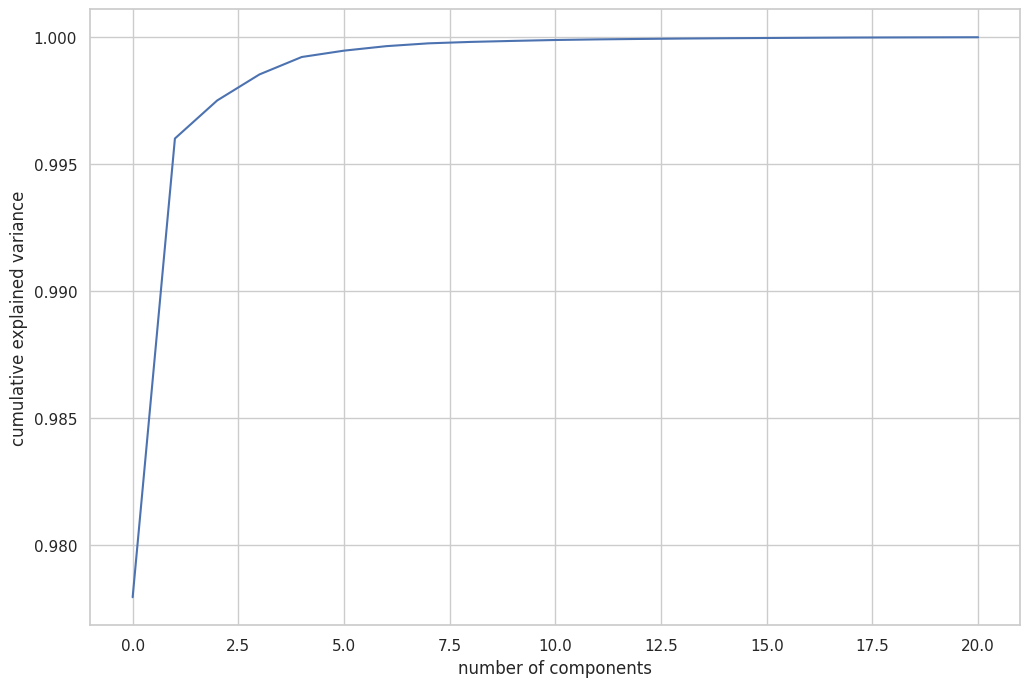

In [151]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_nrm.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [152]:
#Variance of each PC
pca_nrm.explained_variance_ratio_[:10]

array([9.77955960e-01, 1.80580006e-02, 1.49748851e-03, 1.02512942e-03,
       6.85923137e-04, 2.50004437e-04, 1.77007474e-04, 1.11079170e-04,
       5.61050306e-05, 3.94641154e-05])

# Model Building

### Logistic Regression

In [153]:
# Putting response variable to y
y = df_new['Churn']

X = df_new.drop(['Churn'],axis=1)

In [154]:
x_log = pd.get_dummies(X,drop_first = True)

In [155]:
x_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4934 entries, 0 to 5629
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   4934 non-null   int64  
 1   Customer Name                4934 non-null   int64  
 2   Tenure                       4934 non-null   float64
 3   PreferredLoginDevice         4934 non-null   int64  
 4   CityTier                     4934 non-null   int64  
 5   WarehouseToHome              4934 non-null   float64
 6   PreferredPaymentMode         4934 non-null   int64  
 7   Gender                       4934 non-null   int64  
 8   HourSpendOnApp               4934 non-null   float64
 9   NumberOfDeviceRegistered     4934 non-null   int64  
 10  PreferedOrderCat             4934 non-null   int64  
 11  SatisfactionScore            4934 non-null   int64  
 12  MaritalStatus                4934 non-null   int64  
 13  NumberOfAddress   

In [156]:
#Splitting the data into train and test using train_test_split
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log,y, train_size=0.7,test_size=0.3,random_state=100)

In [157]:
x_train_sm = sm.add_constant(x_train_log)

lr = sm.GLM(y_train_log,x_train_sm).fit()
print (lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3453
Model:                            GLM   Df Residuals:                     3431
Model Family:                Gaussian   Df Model:                           21
Link Function:               Identity   Scale:                         0.11320
Method:                          IRLS   Log-Likelihood:                -1127.3
Date:                Tue, 05 Dec 2023   Deviance:                       388.40
Time:                        03:20:04   Pearson chi2:                     388.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2997
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [158]:
lr1 = LogisticRegression()

In [159]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [160]:
rfe = rfe.fit(x_train_log, y_train_log)
rfe_columns = x_train_log.columns[rfe.support_]
rfe_columns

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

Index(['Tenure', 'CityTier', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderCount', 'DaySinceLastOrder'],
      dtype='object')

In [161]:
rfe_columns = ['Tenure', 'CityTier', 'Gender', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderCount', 'DaySinceLastOrder']

In [162]:
lr1.fit(x_train_log[rfe_columns],y_train_log)
print (lr1.coef_)
print (lr1.intercept_)

[[-0.24090428  0.23978978  0.21159984  0.31603201  0.26809718  0.55211311
   0.18195005  1.6154924   0.16313561 -0.15493421]]
[-4.72845037]


In [163]:
y_pred_log = lr1.predict(x_test_log[rfe_columns])
confusion_matrix(y_test_log, y_pred_log)
#y_pred_log

array([[1168,   53],
       [ 120,  140]])

In [164]:
print('Recall Score:', recall_score(y_test_log, y_pred_log))
print('Precision Score:', precision_score(y_test_log, y_pred_log))
print('Accuracy Score:', accuracy_score(y_test_log, y_pred_log))

Recall Score: 0.5384615384615384
Precision Score: 0.7253886010362695
Accuracy Score: 0.8831870357866306


### Decision Tree

In [165]:
# Putting response variable to y
y = df_new['Churn']

X = df_new.drop(['Churn'],axis=1)

In [166]:
#Splitting the data into train and test using train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### taking max_depth as 5 for business understanding.

In [167]:
# Fitting the decision tree with default hyperparameters, apart from

dt_default = DecisionTreeClassifier(max_depth=5,random_state=42)
dt_default.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [168]:
y_pred_dt = dt_default.predict(X_test_dt)

In [169]:
confusion_matrix(y_test_dt, y_pred_dt)

array([[1158,   63],
       [  98,  162]])

In [170]:
#Metrics from the Desicion tree built
print('Recall Score:', recall_score(y_test_dt, y_pred_dt))
print('Precision Score:', precision_score(y_test_dt, y_pred_dt))
print('Accuracy Score:', accuracy_score(y_test_dt, y_pred_dt))

Recall Score: 0.6230769230769231
Precision Score: 0.72
Accuracy Score: 0.8912896691424713


### Random Forest

In [171]:
# Putting response variable to y
y = df_new['Churn']

X = df_new.drop(['Churn'],axis=1)

In [172]:
# Building the random forest with default parameters.
model_rfc_pca = RandomForestClassifier(max_depth=10,random_state=100)

In [173]:
#Splitting the data into train and test using train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [174]:
# fit
model_rfc_pca.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=10, random_state=100)

In [175]:
# Making predictions
y_pred_rf = model_rfc_pca.predict(X_test_rf)

In [176]:
#Confusion Matrix
confusion_matrix(y_test_rf, y_pred_rf)

array([[1196,   25],
       [  80,  180]])

In [177]:
#Model Metrics
print('Recall Score:', recall_score(y_test_rf, y_pred_rf))
print('Precision Score:', precision_score(y_test_rf, y_pred_rf))
print('Accuracy Score:', accuracy_score(y_test_rf, y_pred_rf))

Recall Score: 0.6923076923076923
Precision Score: 0.8780487804878049
Accuracy Score: 0.9291019581363943


### Hyper parameter tuning for Random Forest

In [178]:
#Hyper parameter tuning
params_rf = {
    'max_depth': range(5,50,5),
    #'min_samples_leaf': range(5,30,5),
    #'min_samples_split': range(5,30,5),
    'criterion': ['entropy','gini']
}

In [179]:
model_tuned_rf = RandomForestClassifier(random_state=42)
folds = KFold(n_splits=5, shuffle=True, random_state=42)

In [180]:
model_tuned_rf_cv = GridSearchCV(estimator=model_tuned_rf, param_grid=params_rf,cv=folds, scoring='recall', verbose=1,return_train_score=True)
model_tuned_rf_cv.fit(X_train_rf, y_train_rf)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 50, 5)},
             return_train_score=True, scoring='recall', verbose=1)

In [181]:
#Checking best parameters using  best_estimator_
model_tuned_rf_cv.best_estimator_

RandomForestClassifier(max_depth=20, random_state=42)

In [182]:
#Predicting on test data
y_pred_rf_tuned = model_tuned_rf_cv.predict(X_test_rf)

In [183]:
#confusion matrix
confusion_matrix(y_test_rf, y_pred_rf_tuned)

array([[1199,   22],
       [  52,  208]])

In [184]:
#Model Metrics
print('Recall Score:', recall_score(y_test_rf, y_pred_rf_tuned))
print('Precision Score:', precision_score(y_test_rf, y_pred_rf_tuned))
print('Accuracy Score:', accuracy_score(y_test_rf, y_pred_rf_tuned))

Recall Score: 0.8
Precision Score: 0.9043478260869565
Accuracy Score: 0.950033760972316


#### Comparing Random Forest business metric with and without hyper parameter tuning
Random Forest without hyper parameter tuning accuracy Score: 0.9291019581363943

Random Forest with hyper parameter tuning accuracy Score: 0.950033760972316